In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.isnull().mean()*100

cgpa       0.0
package    0.0
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


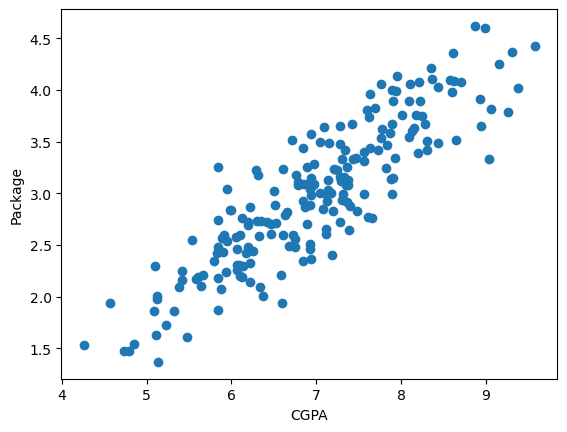

In [8]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [10]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [14]:
X_train.shape,y_train.shape

((160, 1), (160,))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [28]:
y_pred = lr.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [30]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [31]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [32]:
print('RMSE',r2_score(y_test,y_pred))

RMSE 0.780730147510384


# Adjusted r2_score

In [33]:
X_test.shape

(40, 1)

In [35]:
r2 = r2_score(y_test,y_pred)

In [36]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415